# Ford GoBike Share System Data Exploration
## by Weina Mao

## Introduction

> Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.
In this project, I will perform an exploratory analysis on data provided by Ford GoBike, a bike-share system provider.

## Preliminary Wrangling
> First of all, I need to download the data from original website and join them together to make a whole year.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import calendar

%matplotlib inline

In [2]:
path = r'/Users/weinamao/Downloads/Project Template' # use your path
all_files = glob.glob(path+"/*.csv")
li = []

for filename in all_files:
    temp_df = pd.read_csv(filename, index_col=None, header=0)
    li.append(temp_df)

df = pd.concat(li, axis=0, ignore_index=True)
df.to_pickle('2018_bike_share_data_all.pkl')

In [2]:
df = pd.read_pickle('2018_bike_share_data_all.pkl')

In [3]:
print(df.shape)
print(df.dtypes)
df.head(5)

(1863721, 14)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes


### What is the structure of your dataset?

- Data type of start_time, end_time are string, they need to be changed to datetime format for analysis.
- The time variable should be broken into time of day, day of the week, or month of the year.
- Add new vairable called latitude_change to illustrate lattitude difference of a trip.

### What is/are the main feature(s) of interest in your dataset?

- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?
- where are most trips taken because this dataset includes start time/location and end time/location?
- Any relationship between being a subscriber and bike share for all trip?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Information on start_time and end_time can support exploration of the most trips taken in terms of time.
- Trip duration will help me understand the average trip time.
- Information on user types and bike_share_for_all_trip will help support my last question.

In [4]:
# 1. Convert time variables from string to datetime
# a. month of the year
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_month_num'] = df['start_time'].apply(lambda time: time.month)
df['start_month_char'] = df['start_month_num'].apply(lambda x: calendar.month_abbr[x])

In [5]:
# b. morning, afternoon, night of a day
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df['period_day'] = 'morning'
df['period_day'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'afternoon'
df['period_day'] [(df['start_hour'] >= 18) & (df['start_hour'] <= 23)]= 'night'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
# c. Day of the week
df['start_weekday_num'] = df['start_time'].dt.dayofweek
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['start_weekday_char'] = df['start_weekday_num'].map(dmap)

In [7]:
print(df.start_month_char.value_counts())
df.head()

Oct    201458
Jul    199222
Jun    195968
Aug    192162
Sep    186217
May    179125
Nov    134135
Dec    131363
Apr    131169
Mar    111382
Feb    106718
Jan     94802
Name: start_month_char, dtype: int64


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No,2,Feb,23,night,2,Wed
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No,2,Feb,23,night,2,Wed
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No,2,Feb,18,night,2,Wed
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No,2,Feb,18,night,2,Wed
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes,2,Feb,23,night,2,Wed


In [8]:
df['latitude_change'] = df['start_station_latitude'] - df['end_station_latitude']
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char,latitude_change
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,...,1035,Subscriber,No,2,Feb,23,night,2,Wed,0.020394
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,...,1673,Customer,No,2,Feb,23,night,2,Wed,0.016470
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,3498,Customer,No,2,Feb,18,night,2,Wed,-0.024985
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,3129,Customer,No,2,Feb,18,night,2,Wed,-0.024985
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,...,1839,Subscriber,Yes,2,Feb,23,night,2,Wed,0.013822


In [9]:
df.to_pickle('2018_bike_share_data_all_clean.pkl')

In [10]:
df = pd.read_pickle('2018_bike_share_data_all_clean.pkl')

In [11]:
# convert time period, month, and weekday into ordered categorical types
ordinal_var_dict = {'start_month_char': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                    'period_day': ['morning', 'afternoon', 'night'],
                    'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

## Univariate Exploration

#### First I will look at the distribution of time of day, day of week and month of the year.
> More bike share services are used during morning and afternoon, while around 40% less users use bike share service at night. I need to build a bivariate plot to see the duration of each service.

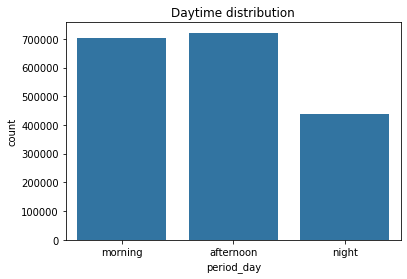

In [12]:
base_color = sb.color_palette()[0]
plt.title('Daytime distribution');
sb.countplot(data=df, x = 'period_day', color = base_color);

> From this plot, people tends to use bike share service during May to October. I huge that the warmer weather play an important role. But I need to build a bivariate plot to see the duration of each service.

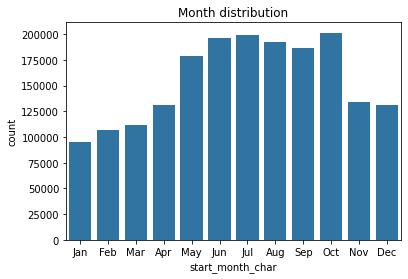

In [13]:
sb.countplot(data=df, x = 'start_month_char', color = base_color);
plt.title('Month distribution');

> We see more bike services are used during weekday than weekend. In order to have better understanding how we profit, I need to build a bivariate plot to see the duration of each service.

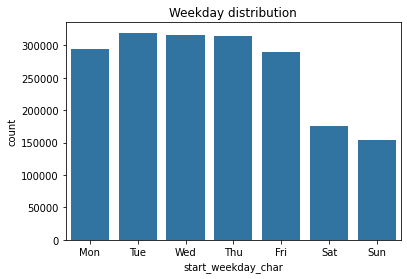

In [14]:
sb.countplot(data=df, x = 'start_weekday_char', color = base_color);
plt.title('Weekday distribution');

#### Second I will check the distribution of Duration

Text(0, 0.5, 'Counts')

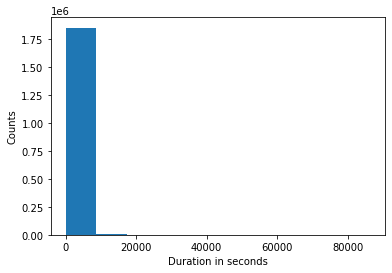

In [15]:
plt.hist(data=df,x='duration_sec', color=base_color);
plt.xlabel('Duration in seconds')
plt.ylabel('Counts')

> There are some outliers in the dataset. I will set limit of on x axles and set thinner bin edges.

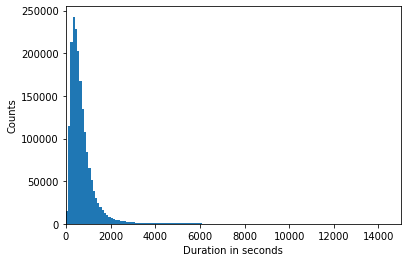

In [16]:
bin_edges = np.arange(0,df.duration_sec.max(),100)
plt.hist(data=df,x='duration_sec', color=base_color, bins =bin_edges);
plt.xlim(0,15000);
plt.xlabel('Duration in seconds');
plt.ylabel('Counts');

In [17]:
np.log10(df.duration_sec.describe())

count    6.270381
mean     2.933134
std      3.374818
min      1.785330
25%      2.544068
50%      2.745075
75%      2.940516
max      4.936343
Name: duration_sec, dtype: float64

In [18]:
df.duration_sec.describe()

count    1.863721e+06
mean     8.573026e+02
std      2.370379e+03
min      6.100000e+01
25%      3.500000e+02
50%      5.560000e+02
75%      8.720000e+02
max      8.636600e+04
Name: duration_sec, dtype: float64

> Duration has a long-tailed distribution, with a lot of rides on the short duration end, and few on the long duration end. When plotted on a log-scale, the price distribution looks roughly unimodal, with one peak between 300 and 1000.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


Text(0, 0.5, 'Counts')

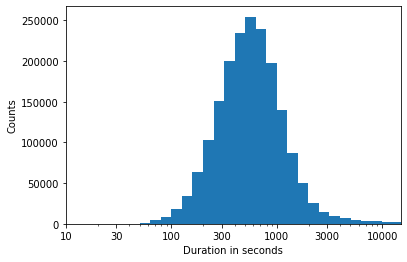

In [19]:
bin_edges= 10**np.arange(1.7,np.log10(df.duration_sec.max())+1,0.1)
plt.hist(data=df, x='duration_sec', color=base_color, bins=bin_edges);
plt.xscale('log');
tick_locs=[10,30,100,300,1000,3000,10000]
plt.xticks(tick_locs,tick_locs);
plt.xlim(0,15000);
plt.xlabel('Duration in seconds')
plt.ylabel('Counts')

#### Customer VS. Subscriber
> There are more subscribers than customers, the price looks reasonable to most of people.

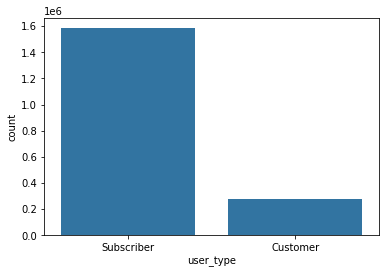

In [20]:
sb.countplot(data=df,x ='user_type', color=base_color);

#### Latitude Change Distribution

In [21]:
df.latitude_change.describe()

count    1.863721e+06
mean    -1.203099e-04
std      1.343173e-02
min     -9.878200e-02
25%     -8.223985e-03
50%      0.000000e+00
75%      7.944741e-03
max      4.415290e-01
Name: latitude_change, dtype: float64

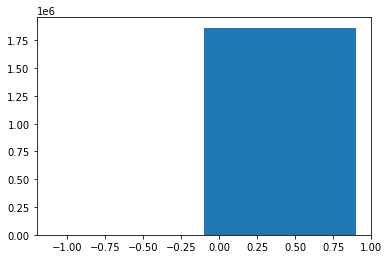

In [27]:
bin_edges = np.arange(df.latitude_change.min()-1, df.latitude_change.max()+1,1)
plt.hist(data=df,x='latitude_change', color=base_color,bins=bin_edges);

> I did not see a big difference in latitute change.

In [28]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char,latitude_change
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,...,1035,Subscriber,No,2,Feb,23,night,2,Wed,0.020394
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,...,1673,Customer,No,2,Feb,23,night,2,Wed,0.016470
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,3498,Customer,No,2,Feb,18,night,2,Wed,-0.024985
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,3129,Customer,No,2,Feb,18,night,2,Wed,-0.024985
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,...,1839,Subscriber,Yes,2,Feb,23,night,2,Wed,0.013822


#### Location
> After checking start and end stations, most stations in San Francisco connect to public transportations such as Caltrain, Bart and Ferry. The Embarcadero at Sansome St is very closed to Ferry building and located in financial distrit. We will see the time factors in these locations later.

In [38]:
# 2. Location: there are 348 start stations. 
print(len(df['start_station_name'].value_counts()))
df['start_station_name'].value_counts().head(8)

348


San Francisco Ferry Building (Harry Bridges Plaza)           38461
San Francisco Caltrain Station 2  (Townsend St at 4th St)    37617
San Francisco Caltrain (Townsend St at 4th St)               35092
Market St at 10th St                                         34918
Berry St at 4th St                                           33716
The Embarcadero at Sansome St                                33390
Montgomery St BART Station (Market St at 2nd St)             32131
Powell St BART Station (Market St at 4th St)                 31656
Name: start_station_name, dtype: int64

In [37]:
# Do they have high traffics as end stations? Looks like yes!
print(len(df['end_station_name'].value_counts()))
df['end_station_name'].value_counts().head(8)

348


San Francisco Caltrain Station 2  (Townsend St at 4th St)    50000
San Francisco Ferry Building (Harry Bridges Plaza)           44113
San Francisco Caltrain (Townsend St at 4th St)               42970
The Embarcadero at Sansome St                                39222
Montgomery St BART Station (Market St at 2nd St)             35955
Market St at 10th St                                         34365
Powell St BART Station (Market St at 4th St)                 33086
Berry St at 4th St                                           32786
Name: end_station_name, dtype: int64

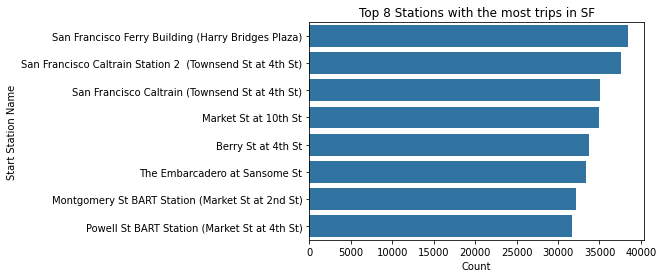

In [40]:
locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Berry St at 4th St','Montgomery St BART Station (Market St at 2nd St)','Powell St BART Station (Market St at 4th St)']
df_top8 = df.loc[df['start_station_name'].isin(locs)]
st_stat_counts = df_top8['start_station_name'].value_counts()
st_stat_order = st_stat_counts.index
sb.countplot(data=df_top8, y='start_station_name', color=base_color, order=st_stat_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 8 Stations with the most trips in SF');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variable duration_sec skew to the right, so I use log transformation to process this vairable. Under the transformation, duration_sec has one peak between 300 and 1000 seconds, which is equal to 6 mins to 20 mins.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I see the services are used less at night, weekend and from December to April. In order to understand how the service profit, I need to do bivariate exploration to include duration_sec.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in my
data. 

#### Duration distribution for each day of a week
> This plot illustrate that although bike share services are used more during weekday by counts, people use bike share service during weekends tend to use for a longer time. The average ussage length on week day is around 520 second, while the average usage length on weeked is around 600 second.

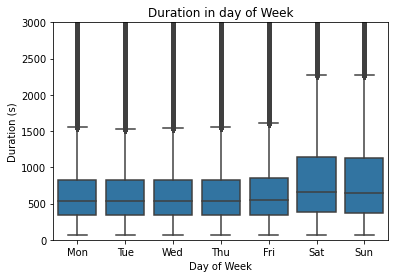

In [65]:
sb.boxplot(data=df,x='start_weekday_char', y='duration_sec',color=base_color)
plt.ylim(0,3000)
plt.title('Duration in day of Week');
plt.xlabel('Day of Week');
plt.ylabel('Duration (s)');

#### Duration distribution for each month of a year
> From univariate plot we saw more usage during May to October. From this box plot, the mean value of the distribution on May to October is also higher than other month. So people not only use more service but also use for longer time during May to October.

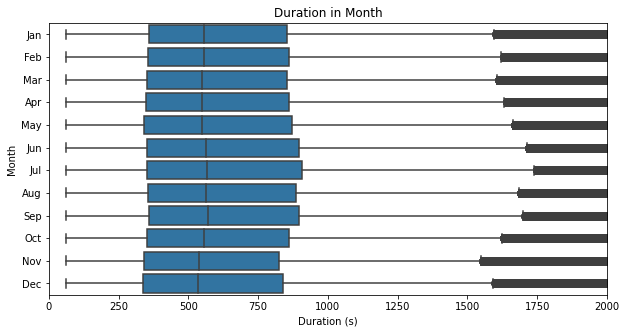

In [64]:
plt.figure(figsize=[10,5]);
sb.boxplot(data=df,y='start_month_char', x='duration_sec',color=base_color)
plt.xlim(0,2000);
plt.title('Duration in Month');
plt.ylabel('Month');
plt.xlabel('Duration (s)');

#### Duration distribution for period of a day
> From this box chart, we can see the duration mean in afternoon is slightly higher than morning and night.

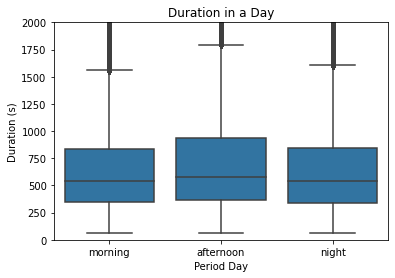

In [62]:
sb.boxplot(data=df,x='period_day', y='duration_sec',color=base_color)
plt.ylim(0,2000)
plt.title('Duration in a Day');
plt.xlabel('Period Day');
plt.ylabel('Duration (s)');

#### Bike share for all trip by user type

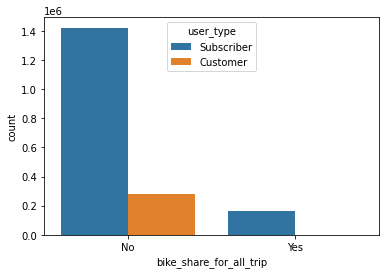

In [72]:
sb.countplot(data=df, hue='user_type', x='bike_share_for_all_trip');

> From subscriber pool, more people use bike service not for their whole trips. 

#### Counts of ride for each month by user type
> We can see subscribers have larger float in weather than customers.

<Figure size 720x360 with 0 Axes>

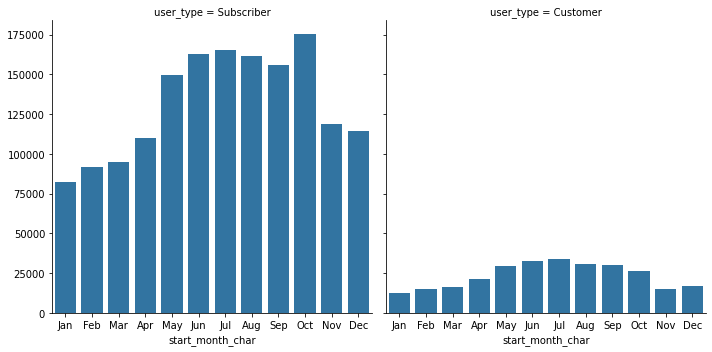

In [92]:
plt.figure(figsize=[10,5]);
g=sb.FacetGrid(data=df,col='user_type',size = 5);
g.map(sb.countplot,'start_month_char');

#### Trip counts in day of a week by period of a day
> From chart below, we can see people use more bike share service during morning on the weekday than weekend. I think most people use it for work transportation. While people use more bike in the afternoon during weekends. I think people get up late and use bike service in the afternoon.

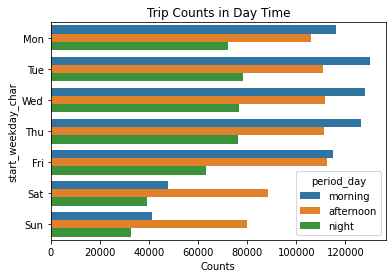

In [79]:
sb.countplot(data=df, hue='period_day', y='start_weekday_char');
plt.xlabel('Counts');
plt.title('Trip Counts in Day Time');

#### Trip counts for top 8 stations by user type
> Apparently, subscribers are more than customers in each station. However, there are more customers at San Francisco Ferry Building (Harry Bridges Plaza) and The Embarcadero at Sansome St stations than at other stations. Customers might include tourists.

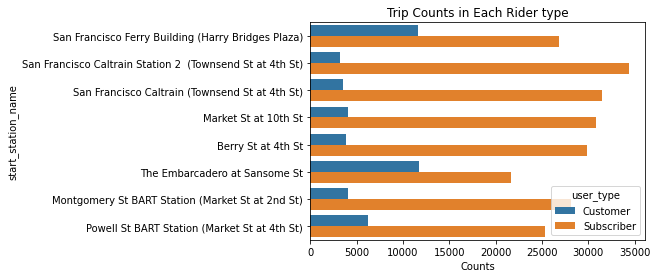

In [104]:
sb.countplot(data=df_top8, hue='user_type', y='start_station_name',order=st_stat_order);
plt.xlabel('Counts');
plt.title('Trip Counts in Each Rider type');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- After checking the duration distribution of each day of the week, people use the bike service more frequently than weekend, while the duration tend to be higher in weekend than weekday.
- On duration distribution of each month over the year, we see higher average duration on May to October. This may caused by weather, which is consist with univariate plot on counts for each month.
- On week day people tend to use bike share service in the morning, while on weekend in the afternoon.
- By exploring the top 8 stations, we see more customers using bike share service at San Francisco Ferry Building (Harry Bridges Plaza) and The Embarcadero at Sansome St stations than at other stations. This might be caused by more tourists in this area.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I see very little customer will use the bike share service for all trip, and this illustrates that people use bike share service will become subscriber since it cost less overall.

## Multivariate Exploration

> In this section, I will create plots of three or more variables to investigate your data even
further. 

#### Trip counts for day of a week by user type
> Customers tend to use the service more in afternoon thoughout the week. While subscribers use more service in the morning during weekdays, afternoon during weekends.

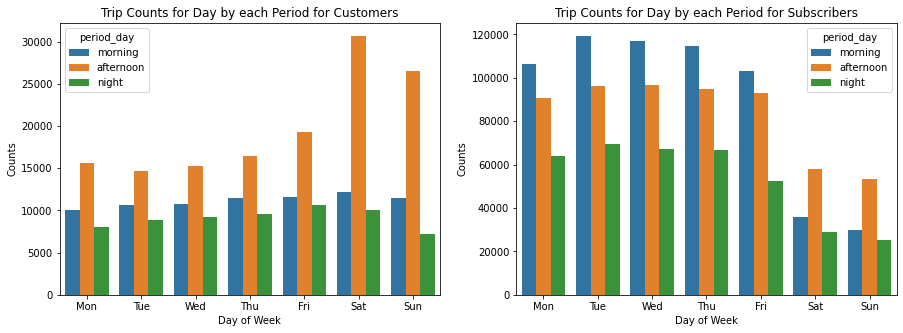

In [113]:
df_cust = df.query('user_type == "Customer"')
df_sub = df.query('user_type == "Subscriber"')
plt.figure(figsize=[15,5]);
plt.subplot(1,2,1);
sb.countplot(data=df_cust,x='start_weekday_char',hue='period_day');
plt.xlabel('Day of Week');
plt.ylabel('Counts');
plt.title('Trip Counts for Day by each Period for Customers');
plt.subplot(1,2,2);
sb.countplot(data=df_sub,x='start_weekday_char',hue='period_day');
plt.xlabel('Day of Week');
plt.ylabel('Counts');
plt.title('Trip Counts for Day by each Period for Subscribers');

#### Trip Counts by day of week for bike all/part trip
> From the charts below, we can see that the station San Francisco Ferry Building (Harry Bridges Plaza) is not most popular station to users who choose bike for all trip for whole days of the week. The station Powell St BART Station (Market St at 4th St) is a lot popular to users who choose bike for all trip for whole days of the week.

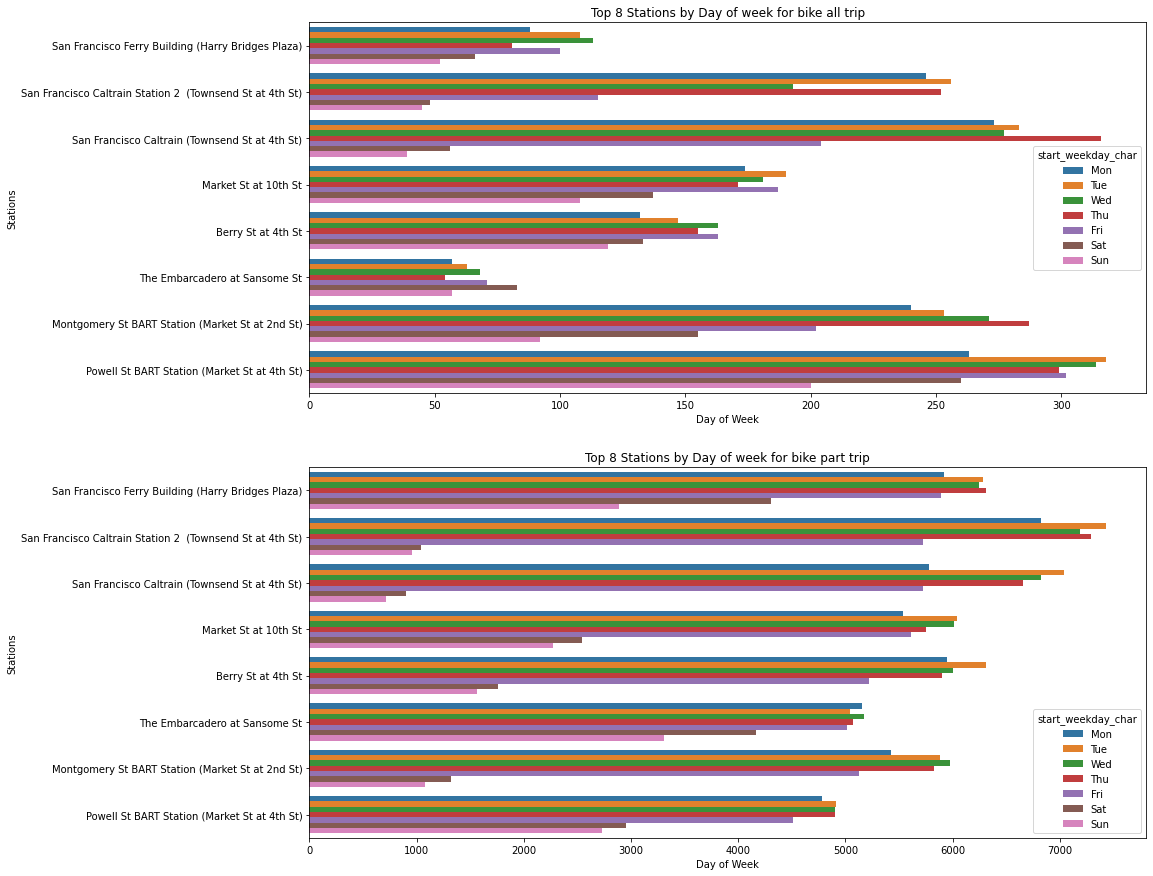

In [105]:
df_all_trip = df_top8.query('bike_share_for_all_trip == "Yes"')
df_part_trip = df_top8.query('bike_share_for_all_trip == "No"')
plt.figure(figsize=[15,15]);
plt.subplot(2,1,1);
sb.countplot(data=df_all_trip,y='start_station_name',hue='start_weekday_char', order=st_stat_order);
plt.xlabel('Day of Week');
plt.ylabel('Stations');
plt.title('Top 8 Stations by Day of week for bike all trip');
plt.subplot(2,1,2);
sb.countplot(data=df_part_trip,y='start_station_name',hue='start_weekday_char',order=st_stat_order);
plt.xlabel('Day of Week');
plt.ylabel('Stations');
plt.title('Top 8 Stations by Day of week for bike part trip');

#### Duration distribution for day of week by period of a day
> From the box plot above, duration of trip is higher on weekends afternoon comparing to weekdays and other time of a day. This demostrate the fact that weekend afternoon is a perfect time for a biking activity.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


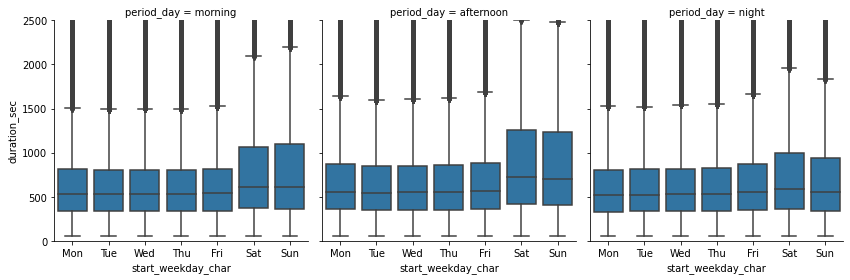

In [110]:
g=sb.FacetGrid(data=df,col='period_day', size =4);
g.map(sb.boxplot,'start_weekday_char','duration_sec');
plt.ylim(0,2500);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- From the previous bivariate plot, we find out most of users use the service in morning during weekday while in the afternoon during weekends. By seperating the users to customers and subscribers, I find out most of customers use the service during afternoon even in weekdays. Customers might be tourists who like to ride a bike in the afternoon. Also, the number of trips increases in the tourist attractions like Ferry building and Embarcadero (close to piers). On the other hand, subscribers might be commuters. The trips in subscribers increase during the weekdays.
- From the previous bivariate plot, we find out San Francisco Ferry Building (Harry Bridges Plaza) is the most popular station for bike sharing. By seperating the users to customers and subscribers, I find out San Francisco Ferry Building (Harry Bridges Plaza) is not as popular for subsribers as for customers the whole days of a week.

### Were there any interesting or surprising interactions between features?

- San Francisco Ferry Building (Harry Bridges Plaza) is the most popular start place over all, but it is neither the most popular start place for the subscriber group nor customer group.